In [2]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
day_reports = os.path.dirname(currentdir)
reports_dir = os.path.dirname(day_reports)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn") 

In [3]:
import numpy as np
import pandas as pd
import os
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

from IPython.display import Image
from sklearn.metrics import confusion_matrix
from reporting_functions import (
    confusion_matrix_stats,
    plot_confusion_matrix_nn,
    get_tp_tn_lists,
    plot_loss,
    get_result_table,
    gather_experiment_results,
    gather_results_deprecated,
    get_file_content,
    get_result_table_target_pairs,
    get_multiclass_results,
)

from circuit_presets import (
    CIRCUIT_OPTIONS,
    POOLING_OPTIONS,
)
from preprocessing import filter_embedding_options, EMBEDDING_OPTIONS

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [4]:
experiments_path = f"{project_home_dir}/experiments"
experiment_filename = "experiment_config.json"  # "experiment.txt"
experiment_time = "experiment_time.json"

In [9]:
experiment_id = 97 # 97 # 100
experiment_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)
experiment_time_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_time}"
)
result_data = gather_experiment_results(f"{experiments_path}/{experiment_id}")

In [10]:
experiment_info

{'ID': 97,
 'path': '../experiments',
 'data': {'target_pairs': [['blues', 'blues'],
   ['classical', 'classical'],
   ['country', 'country'],
   ['disco', 'disco'],
   ['hiphop', 'hiphop'],
   ['jazz', 'jazz'],
   ['metal', 'metal'],
   ['pop', 'pop'],
   ['reggae', 'reggae'],
   ['rock', 'rock']]},
 'type': 'quantum',
 'preprocessing': {'reduction_method': 'pca',
  'scaler': {'Angle': [0, 1.5707963267948966], 'IQP': [-1, 1]},
  'kwargs': {'IQP': {'depth': 7}},
  'embedding_list': ['Angle', 'IQP']},
 'model': {'circuit_list': ['U_5'], 'classification_type': 'ova'},
 'train': {'iterations': 100, 'test_size': 0.3, 'random_state': 39},
 'extra_info': 'Main\n====\n One vs All (ova) classification\n Trying out multiple embeddings: [Angle, IQP]\n IQP with depth 7 and scaled with minmax -1,1\n Angle minmax scaled between 0 and pi/2'}

In [11]:
print(experiment_info["extra_info"])

Main
====
 One vs All (ova) classification
 Trying out multiple embeddings: [Angle, IQP]
 IQP with depth 7 and scaled with minmax -1,1
 Angle minmax scaled between 0 and pi/2


In [12]:
experiment_time_info

{'pca-8-quantum-Angle-U_5-blues-blues': 600.8174653053284,
 'pca-8-quantum-Angle-U_5-classical-classical': 705.5933613777161,
 'pca-8-quantum-Angle-U_5-country-country': 682.9389185905457,
 'pca-8-quantum-Angle-U_5-disco-disco': 777.6135544776917,
 'pca-8-quantum-Angle-U_5-hiphop-hiphop': 902.4365844726562,
 'pca-8-quantum-Angle-U_5-jazz-jazz': 829.7965748310089,
 'pca-8-quantum-Angle-U_5-metal-metal': 834.8416948318481,
 'pca-8-quantum-Angle-U_5-pop-pop': 737.4350454807281,
 'pca-8-quantum-Angle-U_5-reggae-reggae': 672.1869368553162,
 'pca-8-quantum-Angle-U_5-rock-rock': 676.2737941741943,
 'pca-8-quantum-IQP-U_5-blues-blues': 771.8107967376709,
 'pca-8-quantum-IQP-U_5-classical-classical': 780.6423366069794,
 'pca-8-quantum-IQP-U_5-country-country': 790.2435324192047,
 'pca-8-quantum-IQP-U_5-disco-disco': 775.8992612361908,
 'pca-8-quantum-IQP-U_5-hiphop-hiphop': 766.057981967926,
 'pca-8-quantum-IQP-U_5-jazz-jazz': 761.2399227619171,
 'pca-8-quantum-IQP-U_5-metal-metal': 600.7610328

In [13]:
result_data.head()

,model,circuit,circuit_param_count,reduction_method,reduction_size,embedding_option,embedding_class,embedding_permutation,target_levels_list,target_levels,accuracy,precision,recall,f1,loss_train_history,loss_test_history,y_hat,y_test
0,pca-8-quantum-Angle-U_5-blues-blues,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, blues]",blues-blues,0.580,0.171,1.000,0.292,0 18.105 1 16.214 2 17.798 3 1...,0 16.199 1 13.311 2 13.522 3 1...,0 1 1 1 2 0 3 1 4 1 ...,0 1 1 1 2 1 3 1 4 1 ...
1,pca-8-quantum-Angle-U_5-classical-classical,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[classical, classical]",classical-classical,0.720,0.243,0.897,0.382,0 19.090 1 16.835 2 15.740 3 1...,0 14.846 1 18.643 2 16.100 3 1...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 0 4 0 ...
2,pca-8-quantum-Angle-U_5-country-country,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[country, country]",country-country,0.510,0.173,0.882,0.290,0 17.059 1 16.761 2 16.464 3 1...,0 20.582 1 21.149 2 20.376 3 1...,0 0 1 0 2 0 3 0 4 0 ...,0 1 1 1 2 0 3 1 4 1 ...
3,pca-8-quantum-Angle-U_5-disco-disco,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[disco, disco]",disco-disco,0.543,0.160,0.963,0.275,0 17.895 1 16.056 2 17.990 3 1...,0 22.509 1 16.524 2 16.569 3 1...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 1 2 1 3 0 4 0 ...
4,pca-8-quantum-Angle-U_5-hiphop-hiphop,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[hiphop, hiphop]",hiphop-hiphop,0.837,0.321,0.567,0.410,0 15.885 1 18.539 2 16.081 3 1...,0 19.421 1 18.738 2 17.147 3 1...,0 0 1 0 2 0 3 0 4 0 ...,0 1 1 0 2 0 3 0 4 0 ...


In [14]:
result_data.shape

(20, 18)

### Angle encoding ova

/home/matt/dev/projects/quantum-cnn/python_env/qcnn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/dev/projects/quantum-cnn/python_env/qcnn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/dev/projects/quantum-cnn/python_env/qcnn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

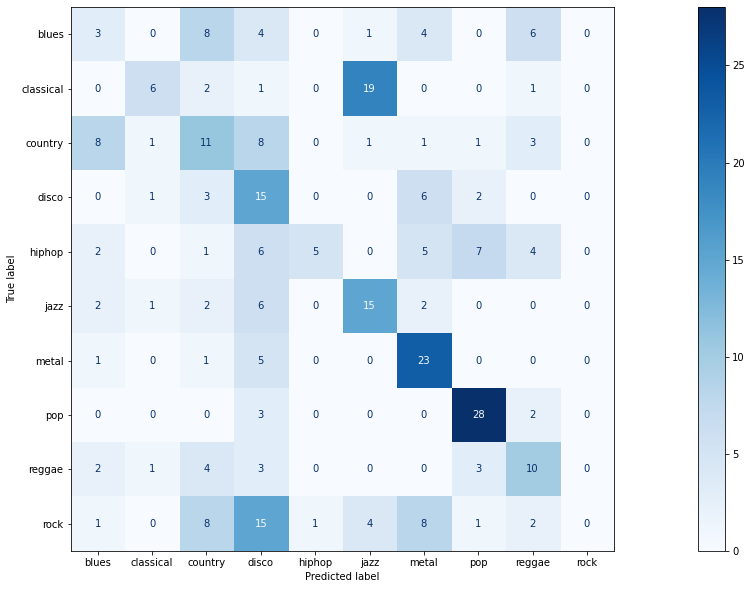

In [15]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-Angle-U_5"
)

In [10]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.16      0.12      0.13        26
   classical       0.60      0.21      0.31        29
     country       0.28      0.32      0.30        34
       disco       0.23      0.56      0.32        27
      hiphop       0.83      0.17      0.28        30
        jazz       0.38      0.54      0.44        28
       metal       0.47      0.77      0.58        30
         pop       0.67      0.85      0.75        33
      reggae       0.36      0.43      0.39        23
        rock       0.00      0.00      0.00        40

    accuracy                           0.39       300
   macro avg       0.40      0.40      0.35       300
weighted avg       0.39      0.39      0.34       300



In [ ]:
### IQP encoding ova

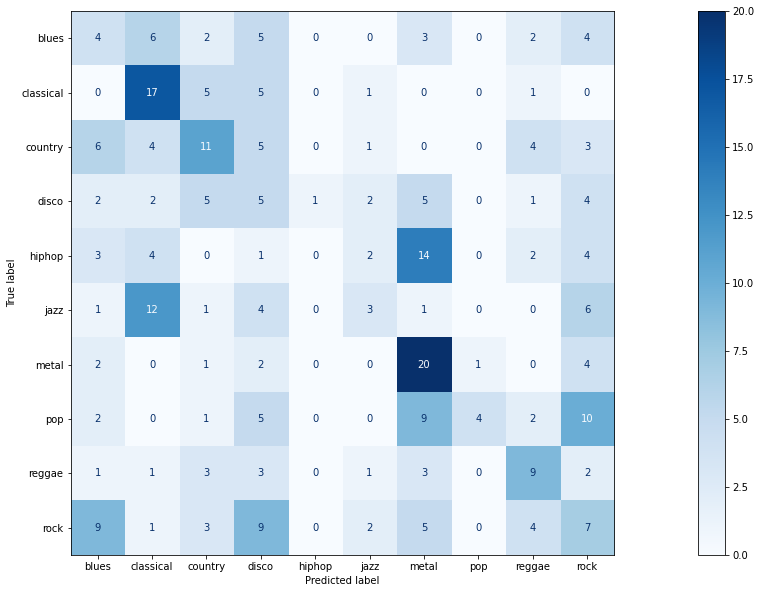

In [11]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-IQP-U_5"
)

In [12]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.13      0.15      0.14        26
   classical       0.36      0.59      0.45        29
     country       0.34      0.32      0.33        34
       disco       0.11      0.19      0.14        27
      hiphop       0.00      0.00      0.00        30
        jazz       0.25      0.11      0.15        28
       metal       0.33      0.67      0.44        30
         pop       0.80      0.12      0.21        33
      reggae       0.36      0.39      0.37        23
        rock       0.16      0.17      0.17        40

    accuracy                           0.27       300
   macro avg       0.29      0.27      0.24       300
weighted avg       0.29      0.27      0.24       300



In [13]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

,blues,classical,hiphop,pop,reggae,rock,metal,jazz,disco,country,Average
blues,0.663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663
classical,NaN,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.720
hiphop,NaN,NaN,0.837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.837
pop,NaN,NaN,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,0.830
reggae,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,0.790
rock,NaN,NaN,NaN,NaN,NaN,0.643,NaN,NaN,NaN,NaN,0.643
metal,NaN,NaN,NaN,NaN,NaN,NaN,0.807,NaN,NaN,NaN,0.807
jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.713,NaN,NaN,0.713
disco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567,NaN,0.567
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567,0.567


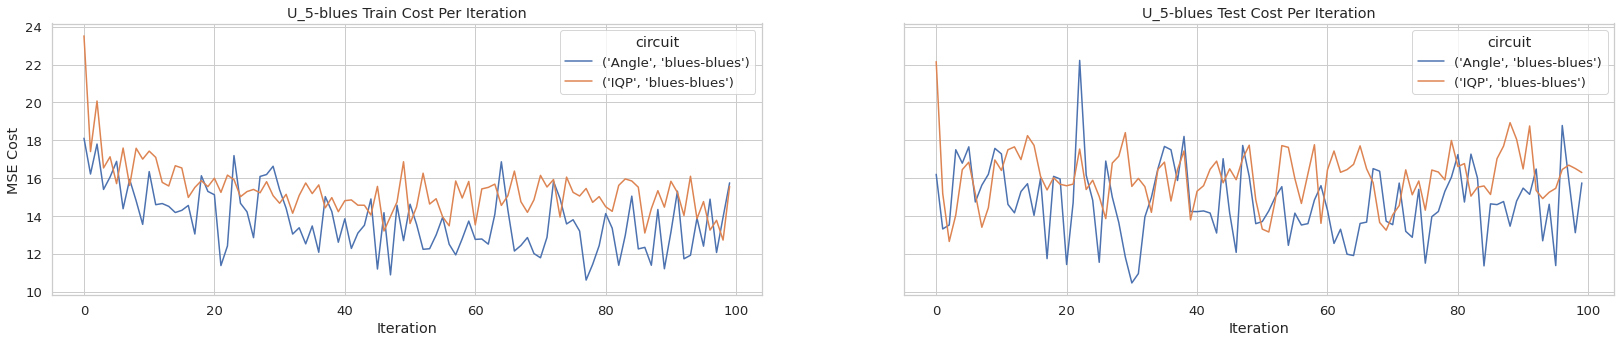

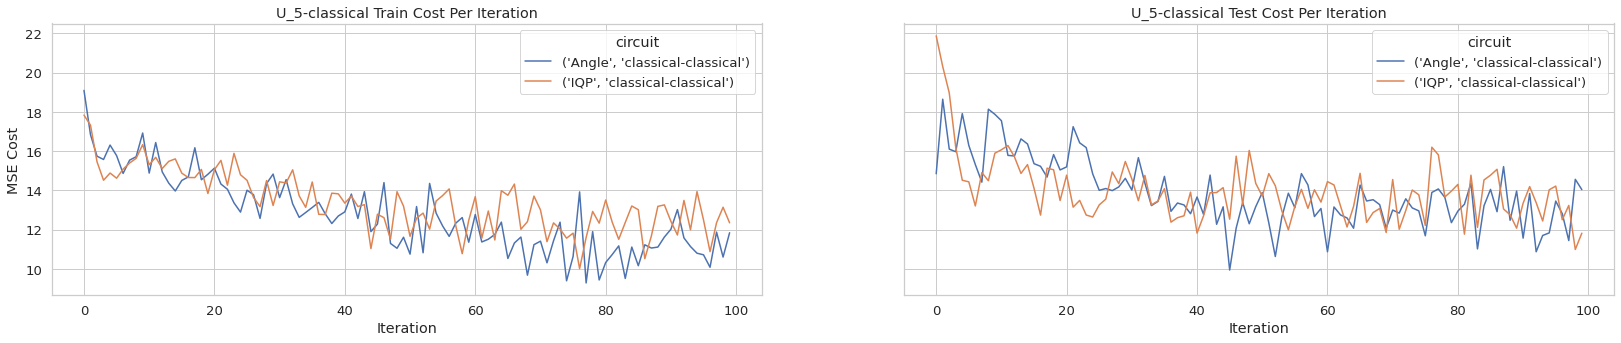

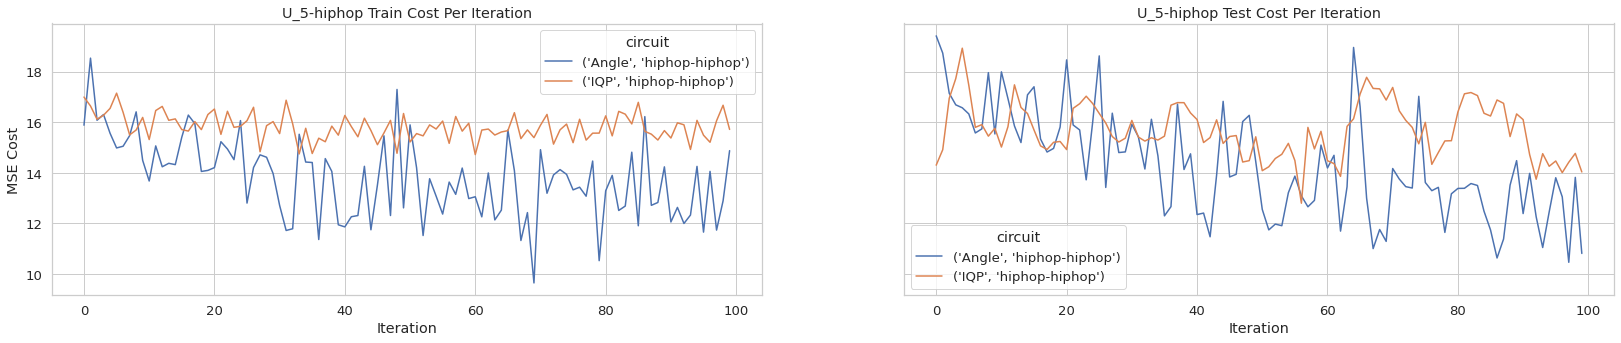

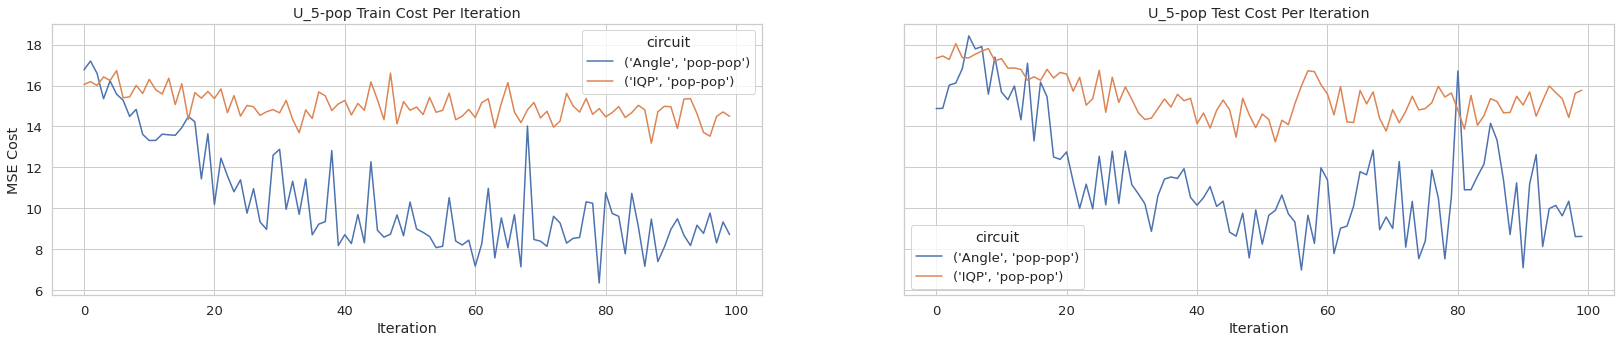

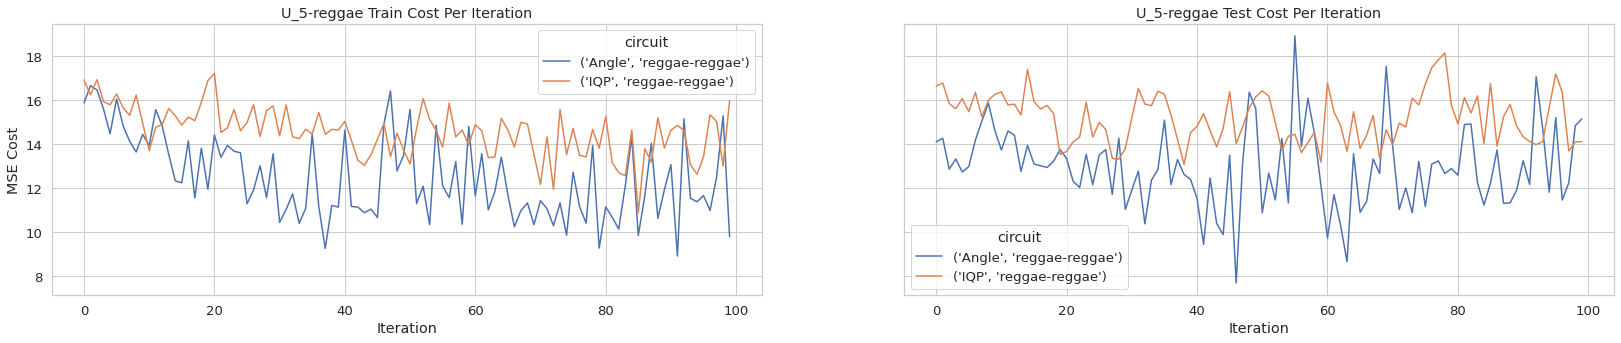

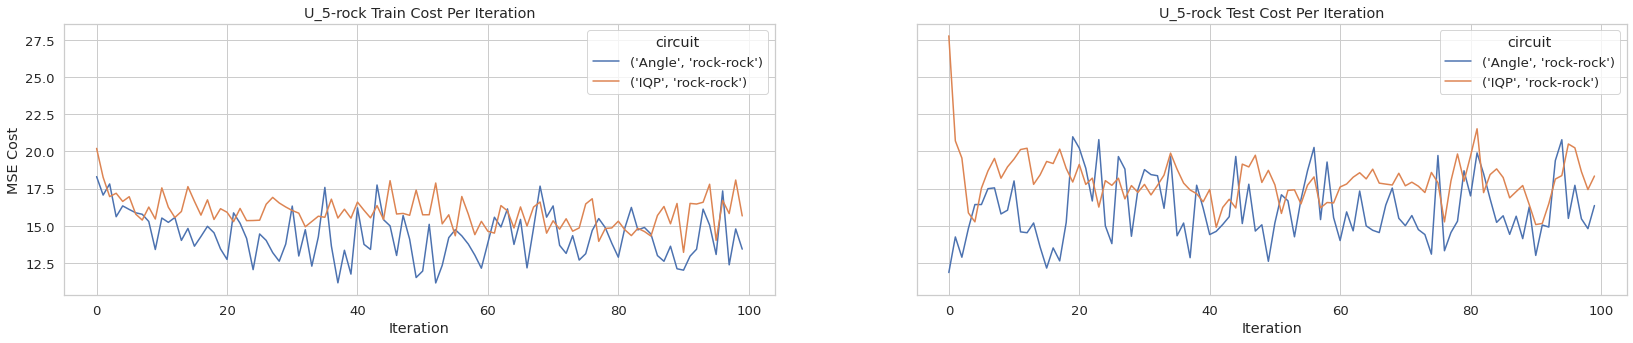

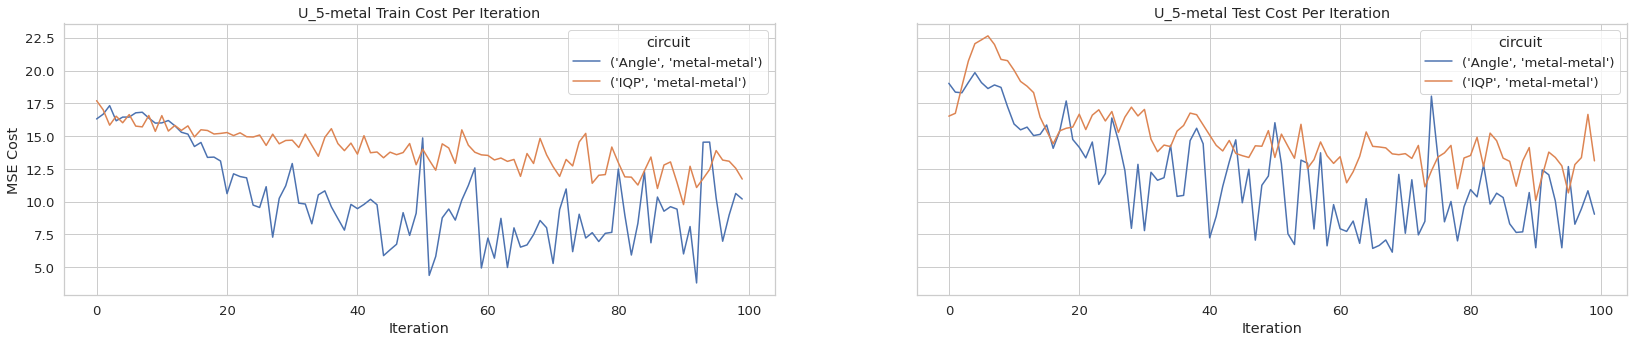

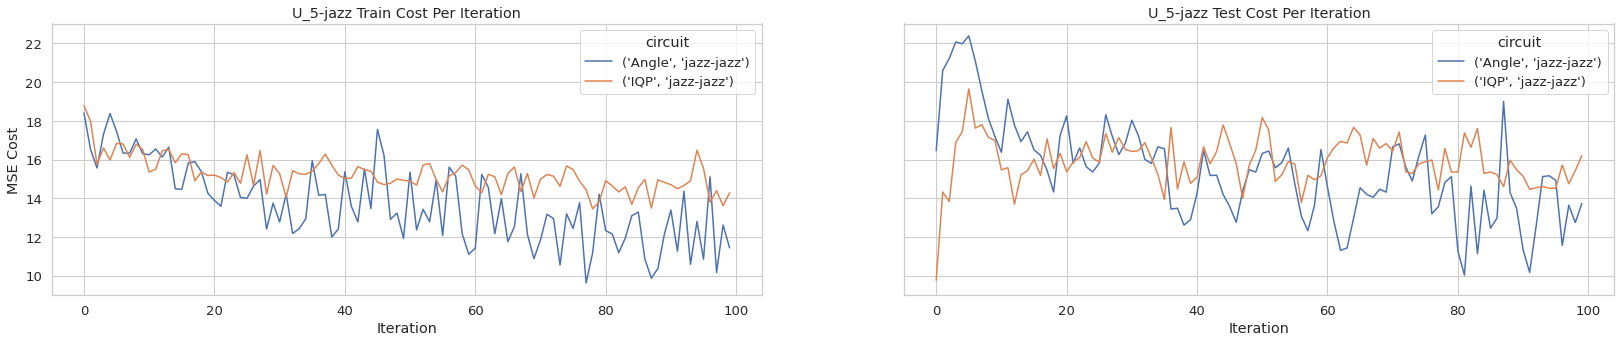

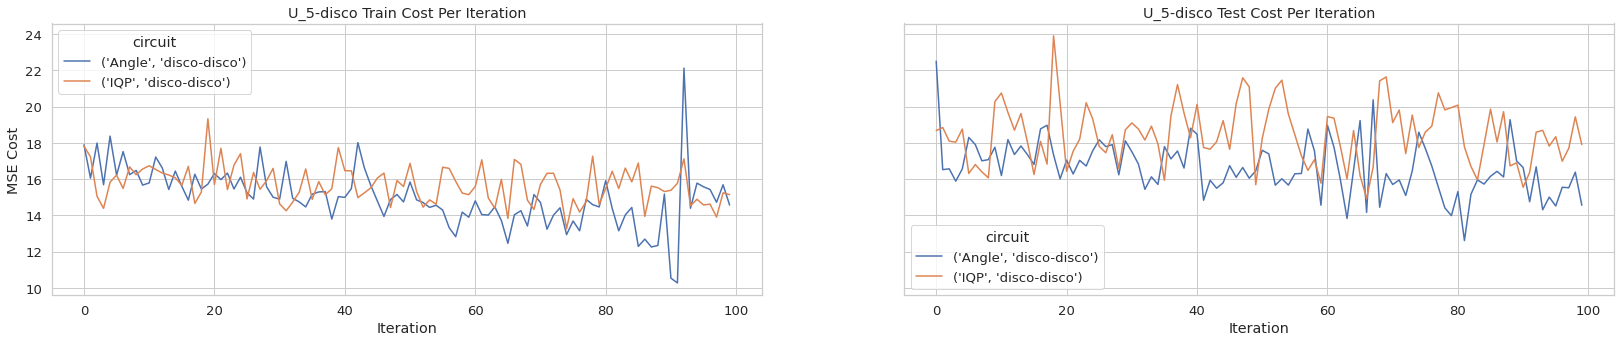

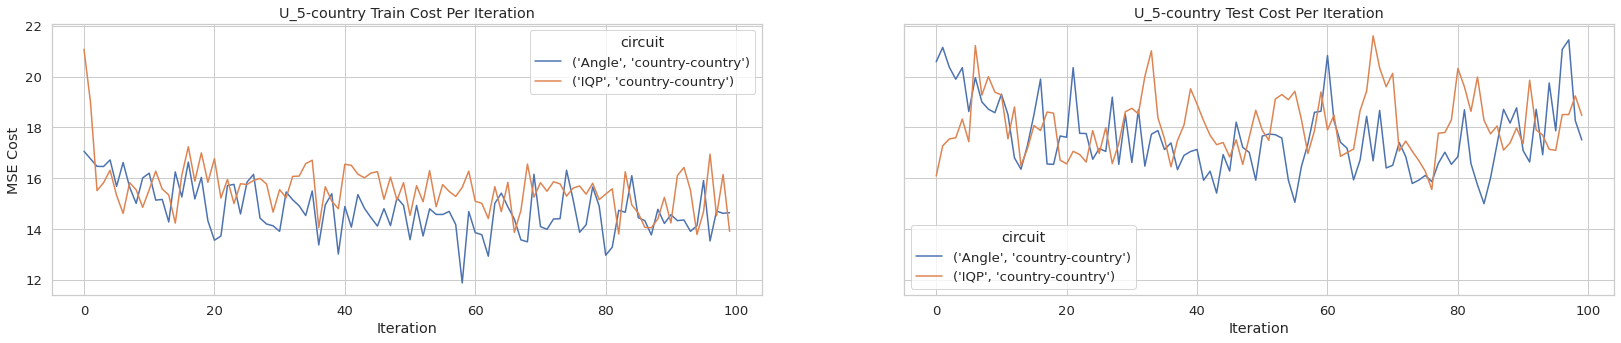

In [14]:
distinct_levels = list(
    {item for combo in experiment_info["data"]["target_pairs"] for item in combo}
)
for level in distinct_levels:
    plot_loss(result_data, ["circuit", "embedding_option", "target_levels"], [f"{level}"], figsize=(28, 5))